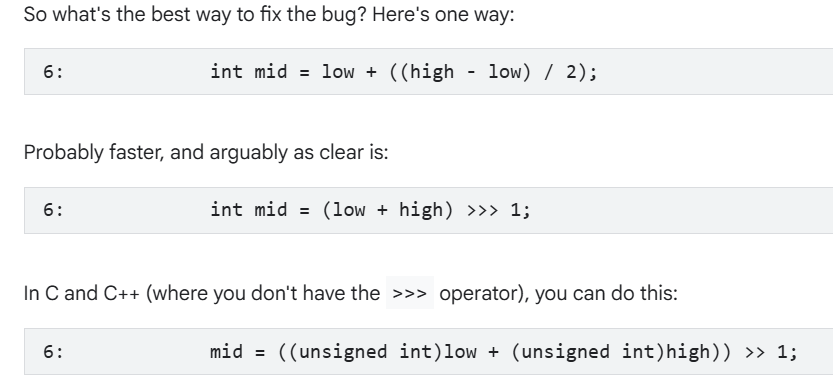

In [ ]:
int mid = low + ((high - low) / 2);

// Alternatively
int mid = (low + high) >>> 1;


In [ ]:
### 1. First Binary search

class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            mid = l + ((r - l)//2)   ### Imp to note "//" is intentional for floor division

            if target > nums[mid]:
                l = mid + 1
            elif (target < nums[mid]):
                r = mid - 1
            else:
                return mid
            
        
        return -1

In [ ]:
## Find a number in array in log n time
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            m = l + ((r - l) // 2)  # (l + r) // 2 can lead to overflow
            if nums[m] > target:
                r = m - 1
            elif nums[m] < target:
                l = m + 1
            else:
                return m
        return -1


In [ ]:
## Search in 2D matrix
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        ROWS, COLS = len(matrix), len(matrix[0])

        top, bot = 0, ROWS - 1
        while top <= bot:
            row = (top + bot) // 2
            if target > matrix[row][-1]:
                top = row + 1
            elif target < matrix[row][0]:
                bot = row - 1
            else:
                break

        if not (top <= bot):
            return False
        row = (top + bot) // 2
        l, r = 0, COLS - 1
        while l <= r:
            m = (l + r) // 2
            if target > matrix[row][m]:
                l = m + 1
            elif target < matrix[row][m]:
                r = m - 1
            else:
                return True
        return False


In [ ]:
## Koko eating banana, here you had to find the search space and then apply BS to satisfy a condition
# To find the search space you have to ask question like what is he min speed it can be 1 okay what max speed it can okay 11 boz there are 11 banana max in one pile, so if you have max rate od eating banana definetly you will able to finish the piles in gievn time but trade of is that the rate od eating will be high and since it i mentioned in the question that KOKO like eating banana slow we have to find the min speed/rate at whcih koko can eat banana.
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        l, r = 1, max(piles) # IMP min speed 1 and max speed is max banana in a pile
        res = r  # Max pile size as an initial placeholder (like infinity) since the answer will be ≤ this.  
        while l <= r:
            k = (l + r) // 2 # kind of mid
            hours = sum(math.ceil(p / k) for p in piles)  # but in this BS question we move l,r based on this hours since that matters.
            
            if hours <= h:
                res = min(res, k)
                r = k - 1
            else:
                l = k + 1
            
        return res


In [ ]:
### Find min in rotated sorted array
# Simple step one to figure out that mid is part of either left sorted portion or right sorted portion
# Step 2  if the mid is part of left sorted portion we search in right section and if the mid is part of right sorted portion we search in left section
# and in each iternation of while loop we keep checking that once find that that portion is sorted we update res with left most value of that portion since that would be minimum
class Solution:
    def findMin(self, nums: List[int]) -> int:
        res = nums[0]
        l, r = 0, len(nums) - 1

        while l <= r:
            if nums[l] < nums[r]: # this is just in case the arry was alreayd sorted on first iteration then we return left most value and break
                res = min(res, nums[l])
                break
            
            m = (l + r) // 2
            res = min(res, nums[m])
            if nums[m] >= nums[l]: # checks if we are in left portion if yes we serach in right section by moving l = m + 1
                l = m + 1
            else:
                r = m - 1
        return res

In [ ]:
### Search in roated sorted array
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            mid = l + (r - l) // 2  # Calculate mid

            if nums[mid] == target:  # Check if mid is the target
                return mid

            # Check if the left side is sorted
            if nums[l] <= nums[mid]:
                # Target is in the left sorted half
                if nums[l] <= target < nums[mid]:
                    r = mid - 1
                else:
                    l = mid + 1
            # Otherwise, the right side must be sorted
            else:
                # Target is in the right sorted half
                if nums[mid] < target <= nums[r]:
                    l = mid + 1
                else:
                    r = mid - 1
        return -1  # Target is not found


### Another easy to understand approach
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums)-1
        
        while l <= r:
            mid = (l+r) // 2

            if target == nums[mid]:
                return mid
            # left sorted array
            if nums[l] <= nums[mid]:
                # make sure target is in between num[l] and nums[mid]
                if target >= nums[l] and target < nums[mid]:
                    r = mid - 1
                else:
                    l = mid + 1
            # right sorted array
            else:
                # make sure target is in between num[mid] and nums[r]
                if target > nums[mid] and target <= nums[r]:
                    l = mid + 1
                else:
                    r = mid -1
        return -1

In [ ]:
# Time - based key value store

class TimeMap:

    def __init__(self):
        self.keyStore = {}  # key : list of [val, timestamp]

    def set(self, key: str, value: str, timestamp: int) -> None:
        if key not in self.keyStore:
            self.keyStore[key] = []
        self.keyStore[key].append([value, timestamp])

    def get(self, key: str, timestamp: int) -> str:
        res, values = "", self.keyStore.get(key, [])
        l, r = 0, len(values) - 1
        while l <= r:
            m = (l + r) // 2
            if values[m][1] <= timestamp:
                res = values[m][0]
                l = m + 1
            else:
                r = m - 1
        return res